# This notebooks visualized the data. To do that the classes and entries per class are used

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

d = '/home/sebastian/Documents/Hauptprojekt/Daten_sorted/'

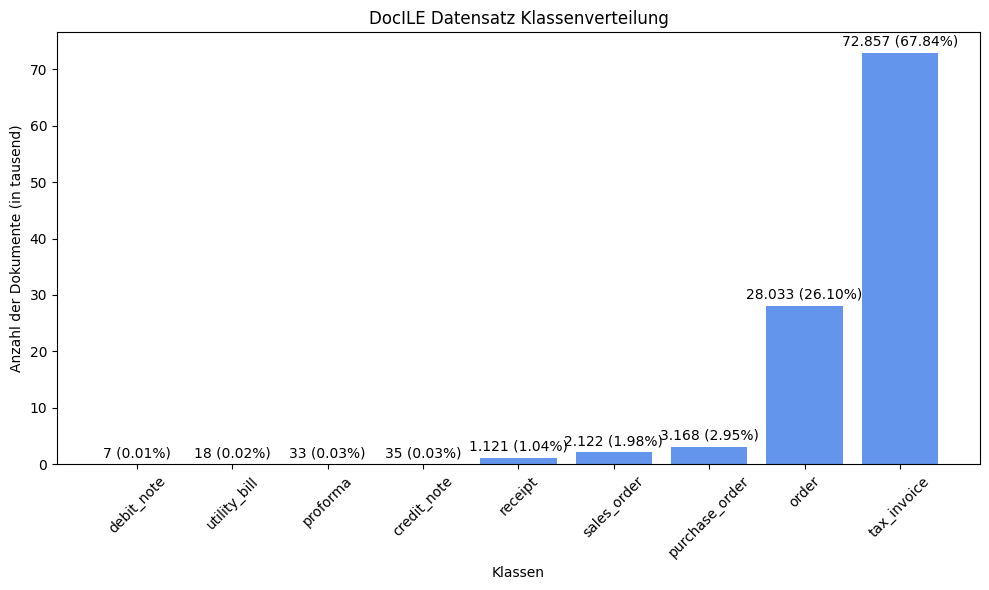

In [2]:
font = {'size': 10}
matplotlib.rc('font', **font)

# Your data
classes = (os.listdir(d))

paths = [os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d, o))]

nbEntries = []

for i in range(len(classes)):
    nbEntries.append(len(os.listdir(paths[i])))

# Calculate the total number of entries
total_entries = sum(nbEntries)

# Divide y-axis values by 1000
nbEntries_divided = [value / 1000 for value in nbEntries]

# Calculate the percentage of each class
percentages = [(value / total_entries) * 100 for value in nbEntries]

# Sort data in descending order based on the number of entries
sorted_indices = sorted(range(len(nbEntries_divided)), key=lambda k: nbEntries_divided[k], reverse=False)
classes_sorted = [classes[i] for i in sorted_indices]
nbEntries_sorted = [nbEntries_divided[i] for i in sorted_indices]
percentages_sorted = [percentages[i] for i in sorted_indices]

# Create a bar plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(classes_sorted, nbEntries_sorted, color='cornflowerblue')

# Set labels and title
ax.set_xlabel('Klassen')
ax.set_ylabel('Anzahl der Dokumente (in tausend)')
ax.set_title('DocILE Datensatz Klassenverteilung')

# Add data labels on top of the bars with a dot as a thousand separator
for bar, percentage in zip(bars, percentages_sorted):
    height = bar.get_height()
    formatted_value = '{:,.0f}'.format(nbEntries[classes.index(classes_sorted[bars.index(bar)])])
    formatted_value = formatted_value.replace(',', '.')  # Replace comma with dot
    label_text = '{} ({:.2f}%)'.format(formatted_value, percentage)
    ax.annotate(label_text,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset for better alignment
                textcoords="offset points",
                ha='center', va='bottom')

# Modify y-axis tick labels to reflect values in thousands with a dot as a thousand separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x).replace(',', '.')))

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Hauptprojekt/Datenvorbereitung/Datenverteilung.png')
plt.show()
